In [6]:
# --- Step 1: Import library ---
from scipy.optimize import newton  # for IRR calculation

# --- Step 2: Define NPV function ---
def calculate_npv(cash_flows, discount_rate):
    """
    cash_flows: list of cash flows (year 0, year 1, ...)
    discount_rate: rate in decimal (10% = 0.1)
    """
    npv = 0
    for t in range(len(cash_flows)):
        npv += cash_flows[t] / (1 + discount_rate) ** t
    return npv

# --- Step 3: Define IRR function ---
def calculate_irr(cash_flows):
    """
    IRR is the discount rate that makes NPV = 0
    """
    npv_function = lambda r: sum(cash_flows[t] / (1 + r) ** t for t in range(len(cash_flows)))
    irr = newton(npv_function, 0.1)  # initial guess = 10%
    return irr

# --- Step 4: Input Example Cash Flows ---
cash_flows = [-1000, 500, 600, 700]  # investment and returns
discount_rate = 0.1  # 10%

# --- Step 5: Calculate ---
npv = calculate_npv(cash_flows, discount_rate)
irr = calculate_irr(cash_flows)

# --- Step 6: Show Results ---
print("Cash Flows:", cash_flows)
print(f"Discount Rate: {discount_rate*100:.1f}%")
print(f"NPV: {npv:.2f}")
print(f"IRR: {irr:.2%}")

# --- Step 7: Decision Rule ---
if (npv > 0) and (irr > discount_rate):
    print("✅ Decision: ACCEPT the project (profitable & attractive).")
else:
    print("❌ Decision: REJECT the project (not worth investing).")

Cash Flows: [-1000, 500, 600, 700]
Discount Rate: 10.0%
NPV: 476.33
IRR: 33.87%
✅ Decision: ACCEPT the project (profitable & attractive).


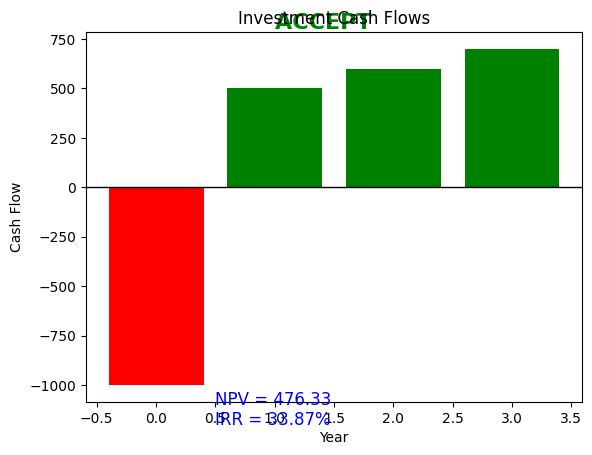

In [8]:
# --- Step 8: Visualization of Cash Flows + Decision ---
import matplotlib.pyplot as plt

years = list(range(len(cash_flows)))
colors = ['red' if cf < 0 else 'green' for cf in cash_flows]  # red = outflow, green = inflow

plt.bar(years, cash_flows, color=colors)
plt.axhline(0, color='black', linewidth=1)  # baseline
plt.title("Investment Cash Flows")
plt.xlabel("Year")
plt.ylabel("Cash Flow")

# --- Show Decision on Chart ---
if (npv > 0) and (irr > discount_rate):
    decision = "ACCEPT "
    plt.text(1, max(cash_flows) + 100, decision, fontsize=16, color="green", weight="bold")
else:
    decision = "REJECT "
    plt.text(1, max(cash_flows) + 100, decision, fontsize=16, color="red", weight="bold")

# --- Show NPV & IRR inside the chart ---
plt.text(0.5, min(cash_flows) - 100, f"NPV = {npv:.2f}", fontsize=12, color="blue")
plt.text(0.5, min(cash_flows) - 200, f"IRR = {irr*100:.2f}%", fontsize=12, color="blue")

plt.show()

In [9]:
# --- Step 9: Payback Period Calculation ---
def calculate_payback(cash_flows):
    """
    Returns the payback period in years
    If investment never recovered, returns None
    """
    cumulative_cashflow = 0
    for year, cf in enumerate(cash_flows):
        cumulative_cashflow += cf
        if cumulative_cashflow >= 0:   # investment recovered
            return year
    return None  # never recovered

payback_period = calculate_payback(cash_flows)
print(f"Payback Period: {payback_period} years" if payback_period is not None else "Project never pays back.")

Payback Period: 2 years


In [11]:
# --- Step 10: Final Investment Decision (NPV + IRR + Payback) ---
if (npv > 0) and (irr > discount_rate) and (payback_period <= 3):
    print("✅ Decision: ACCEPT (good on all measures)")
else:
    print("❌ Decision: REJECT")

✅ Decision: ACCEPT (good on all measures)


Title: Investment Decision(Financial) Calculator using Python
**bold text**
In this project, I built an investment decision calculator in Python (Google Colab). The calculator uses Net Present Value (NPV) and Internal Rate of Return (IRR) to evaluate projects, which are standard time value of money techniques.

As a creative extension, I also added the Payback Period calculation (to check how many years it takes to recover the investment). Although I did not add its visualization, it still strengthens the decision-making process.

I also created a cash flow visualization (bar chart) where negative flows are shown in red, positive flows in green, and the final decision (ACCEPT/REJECT) is displayed on the chart.

Reflection:

I learned how to define Python functions for financial formulas.

My favorite part was connecting finance theory with Python code, and adding visualization that makes the decision easy to understand.

Adding Payback Period (extra rule) helped me go beyond the basic requirement and show creativity.